# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

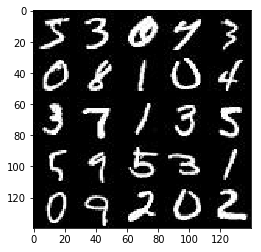

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

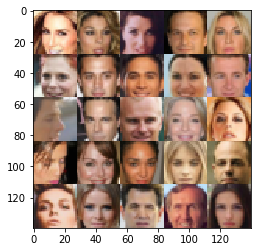

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

/home/alex/.conda/envs/idp3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


TensorFlow Version: 1.6.0
Default GPU Device: /device:GPU:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_real = tf.placeholder(tf.float32,[None, image_width, image_height, image_channels],  name='input_real')
    input_z = tf.placeholder(tf.float32, [None, z_dim],  name='input_z')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')
    
    return (input_real, input_z, learning_rate)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False, alpha=0.2):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function

    # Input layer is 28x28x3
    with tf.variable_scope('discriminator', reuse=reuse):
        
        x1 = tf.layers.conv2d(images, 56, 5, strides=2, padding='same')
        #x1 = tf.layers.batch_normalization(x1, training=True)
        x1 = tf.maximum(alpha * x1, x1)
        
        
        x2 = tf.layers.conv2d(x1, 112, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=True)
        x2 = tf.maximum(alpha * x2, x2)
        
        
        x3 = tf.layers.conv2d(x2, 224, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=True)
        x3 = tf.maximum(alpha * x3, x3)
        
        flat = tf.reshape(x3, (-1, 4*4*224))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
        return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    alpha=0.2
    dropout = 0.8
    with tf.variable_scope('generator', reuse= not is_train):
        # First fully connected layer
        x1 = tf.layers.dense(z, 7*7*512)
        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        x1 = tf.nn.dropout(x1, dropout)
        # 7x7x512 now
        
                
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        x2 = tf.nn.dropout(x2, dropout)
        # 14x14x256 now
        
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=1, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        x3 = tf.nn.dropout(x3, dropout)
        # 28x28x128 now
        
        
        x4 = tf.layers.conv2d_transpose(x3, 64, 5, strides=1, padding='same')
        x4 = tf.layers.batch_normalization(x4, training=is_train)
        x4 = tf.maximum(alpha * x3, x3)
        x4 = tf.nn.dropout(x3, dropout)
        # 28x28x64 now
        
        logits = tf.layers.conv2d_transpose(x4, out_channel_dim, 3, strides=2, padding='same')
        # 8x8x256 now
        
        out = tf.tanh(logits)
        
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    
    d_loss = d_loss_real + d_loss_fake
    
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    
    
    #tf.reset_default_graph()
    input_real, input_z, input_lr = model_inputs(image_width = data_shape[1], 
                                       image_height = data_shape[2], 
                                       image_channels = data_shape[3], z_dim=z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
    d_opt, g_opt = model_opt(d_loss, g_loss, input_lr, beta1=beta1)
        
    
    saver = tf.train.Saver()
    
    print_every=10
    show_every=100
    steps = 0
    z_size = 100
    n_image = 16
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                steps += 1
                
                batch_images = batch_images * 2 # scale from (-0.5, 0.5) to (-1.0, 1.0)
                
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))         
                
                sess.run(d_opt, feed_dict={input_real:batch_images, input_z:batch_z, input_lr:learning_rate})
            
                sess.run(g_opt, feed_dict={input_real:batch_images, input_z:batch_z, input_lr:learning_rate})
                
                
                if steps % print_every == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    
                if steps % show_every == 0:
                    show_generator_output(sess, n_image, input_z, data_shape[3], data_image_mode)
        
        saver.save(sess, './checkpoints/generator.ckpt')
    

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 1.0170... Generator Loss: 1.9199
Epoch 1/2... Discriminator Loss: 0.6470... Generator Loss: 1.7083
Epoch 1/2... Discriminator Loss: 0.6242... Generator Loss: 2.9339
Epoch 1/2... Discriminator Loss: 0.8002... Generator Loss: 2.3289
Epoch 1/2... Discriminator Loss: 0.6404... Generator Loss: 2.6555
Epoch 1/2... Discriminator Loss: 1.0097... Generator Loss: 1.2071
Epoch 1/2... Discriminator Loss: 1.0056... Generator Loss: 1.5365
Epoch 1/2... Discriminator Loss: 1.5439... Generator Loss: 0.3442
Epoch 1/2... Discriminator Loss: 1.1329... Generator Loss: 0.7046
Epoch 1/2... Discriminator Loss: 1.8964... Generator Loss: 0.2646


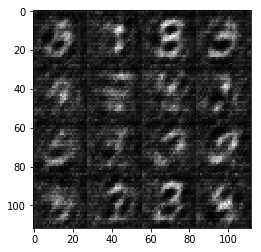

Epoch 1/2... Discriminator Loss: 1.2306... Generator Loss: 0.5282
Epoch 1/2... Discriminator Loss: 1.0902... Generator Loss: 1.9093
Epoch 1/2... Discriminator Loss: 0.9805... Generator Loss: 1.4659
Epoch 1/2... Discriminator Loss: 1.2130... Generator Loss: 0.8329
Epoch 1/2... Discriminator Loss: 1.1593... Generator Loss: 0.7591
Epoch 1/2... Discriminator Loss: 0.8887... Generator Loss: 1.2995
Epoch 1/2... Discriminator Loss: 1.0364... Generator Loss: 1.9028
Epoch 1/2... Discriminator Loss: 1.4654... Generator Loss: 0.3742
Epoch 1/2... Discriminator Loss: 0.9381... Generator Loss: 0.9588
Epoch 1/2... Discriminator Loss: 0.9610... Generator Loss: 0.8881


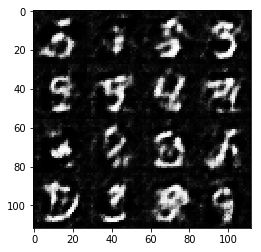

Epoch 1/2... Discriminator Loss: 1.2673... Generator Loss: 0.5095
Epoch 1/2... Discriminator Loss: 1.0908... Generator Loss: 1.3069
Epoch 1/2... Discriminator Loss: 0.8872... Generator Loss: 1.5571
Epoch 1/2... Discriminator Loss: 0.8820... Generator Loss: 0.9321
Epoch 1/2... Discriminator Loss: 1.3853... Generator Loss: 2.2623
Epoch 1/2... Discriminator Loss: 0.7703... Generator Loss: 1.4577
Epoch 1/2... Discriminator Loss: 1.1676... Generator Loss: 0.5571
Epoch 1/2... Discriminator Loss: 1.1665... Generator Loss: 0.5318
Epoch 1/2... Discriminator Loss: 1.0312... Generator Loss: 1.6286
Epoch 1/2... Discriminator Loss: 1.0723... Generator Loss: 1.9098


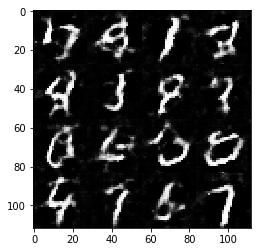

Epoch 1/2... Discriminator Loss: 0.9046... Generator Loss: 1.0225
Epoch 1/2... Discriminator Loss: 0.9708... Generator Loss: 2.1156
Epoch 1/2... Discriminator Loss: 1.4502... Generator Loss: 0.3531
Epoch 1/2... Discriminator Loss: 0.8815... Generator Loss: 1.5620
Epoch 1/2... Discriminator Loss: 0.9691... Generator Loss: 0.9633
Epoch 1/2... Discriminator Loss: 1.0741... Generator Loss: 0.7582
Epoch 1/2... Discriminator Loss: 0.9730... Generator Loss: 1.3931
Epoch 1/2... Discriminator Loss: 1.3729... Generator Loss: 0.4013
Epoch 1/2... Discriminator Loss: 1.9978... Generator Loss: 0.2425
Epoch 1/2... Discriminator Loss: 0.9648... Generator Loss: 1.3834


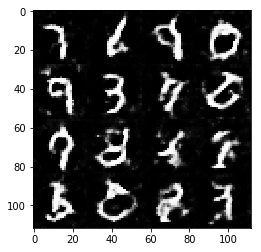

Epoch 1/2... Discriminator Loss: 0.9804... Generator Loss: 0.6643
Epoch 1/2... Discriminator Loss: 1.0999... Generator Loss: 0.6121
Epoch 1/2... Discriminator Loss: 1.1588... Generator Loss: 1.7960
Epoch 1/2... Discriminator Loss: 1.1375... Generator Loss: 0.9676
Epoch 1/2... Discriminator Loss: 1.1181... Generator Loss: 0.6480
Epoch 1/2... Discriminator Loss: 1.5664... Generator Loss: 0.3398
Epoch 2/2... Discriminator Loss: 1.1143... Generator Loss: 0.9665
Epoch 2/2... Discriminator Loss: 0.8752... Generator Loss: 0.9726
Epoch 2/2... Discriminator Loss: 1.3313... Generator Loss: 0.4273
Epoch 2/2... Discriminator Loss: 0.8097... Generator Loss: 1.3400


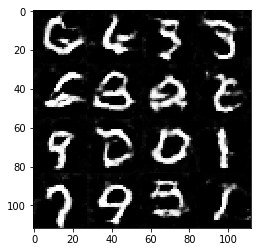

Epoch 2/2... Discriminator Loss: 0.9750... Generator Loss: 1.1557
Epoch 2/2... Discriminator Loss: 1.7235... Generator Loss: 2.5348
Epoch 2/2... Discriminator Loss: 2.3138... Generator Loss: 2.9967
Epoch 2/2... Discriminator Loss: 1.0178... Generator Loss: 0.7413
Epoch 2/2... Discriminator Loss: 0.9062... Generator Loss: 1.2018
Epoch 2/2... Discriminator Loss: 1.3056... Generator Loss: 2.1206
Epoch 2/2... Discriminator Loss: 0.9472... Generator Loss: 0.8627
Epoch 2/2... Discriminator Loss: 0.9412... Generator Loss: 1.5553
Epoch 2/2... Discriminator Loss: 0.8302... Generator Loss: 1.3193
Epoch 2/2... Discriminator Loss: 1.4490... Generator Loss: 1.8634


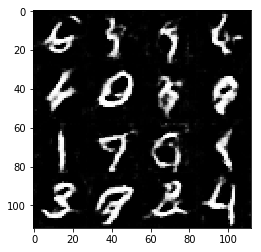

Epoch 2/2... Discriminator Loss: 0.9089... Generator Loss: 0.8585
Epoch 2/2... Discriminator Loss: 0.8833... Generator Loss: 1.3140
Epoch 2/2... Discriminator Loss: 1.0076... Generator Loss: 0.6341
Epoch 2/2... Discriminator Loss: 3.4874... Generator Loss: 4.5659
Epoch 2/2... Discriminator Loss: 1.2001... Generator Loss: 0.8663
Epoch 2/2... Discriminator Loss: 1.2263... Generator Loss: 0.9813
Epoch 2/2... Discriminator Loss: 1.1306... Generator Loss: 0.6714
Epoch 2/2... Discriminator Loss: 0.9662... Generator Loss: 1.3770
Epoch 2/2... Discriminator Loss: 1.0588... Generator Loss: 1.1206
Epoch 2/2... Discriminator Loss: 1.0525... Generator Loss: 0.7219


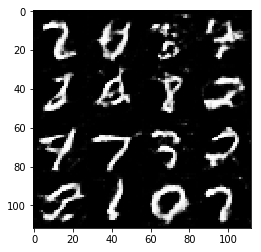

Epoch 2/2... Discriminator Loss: 0.8708... Generator Loss: 1.0304
Epoch 2/2... Discriminator Loss: 1.0175... Generator Loss: 0.8957
Epoch 2/2... Discriminator Loss: 1.2381... Generator Loss: 0.4724
Epoch 2/2... Discriminator Loss: 0.8559... Generator Loss: 1.6673
Epoch 2/2... Discriminator Loss: 0.9388... Generator Loss: 0.8252
Epoch 2/2... Discriminator Loss: 0.7851... Generator Loss: 0.9379
Epoch 2/2... Discriminator Loss: 0.9102... Generator Loss: 0.9184
Epoch 2/2... Discriminator Loss: 1.0282... Generator Loss: 0.7459
Epoch 2/2... Discriminator Loss: 0.6703... Generator Loss: 1.5860
Epoch 2/2... Discriminator Loss: 1.0982... Generator Loss: 1.7825


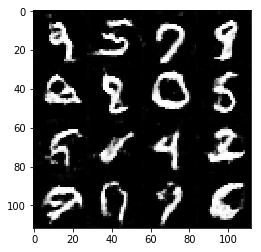

Epoch 2/2... Discriminator Loss: 0.8530... Generator Loss: 0.9850
Epoch 2/2... Discriminator Loss: 0.8159... Generator Loss: 1.8113
Epoch 2/2... Discriminator Loss: 1.3943... Generator Loss: 2.5050
Epoch 2/2... Discriminator Loss: 0.9816... Generator Loss: 0.8229
Epoch 2/2... Discriminator Loss: 1.3465... Generator Loss: 2.7627
Epoch 2/2... Discriminator Loss: 1.2717... Generator Loss: 0.4854
Epoch 2/2... Discriminator Loss: 0.7759... Generator Loss: 1.0244
Epoch 2/2... Discriminator Loss: 1.0091... Generator Loss: 0.6041
Epoch 2/2... Discriminator Loss: 0.6627... Generator Loss: 1.1231
Epoch 2/2... Discriminator Loss: 0.8640... Generator Loss: 0.9802


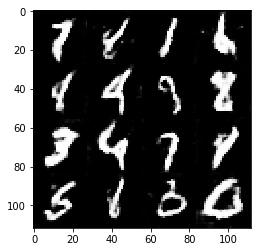

Epoch 2/2... Discriminator Loss: 0.6904... Generator Loss: 1.3998
Epoch 2/2... Discriminator Loss: 0.5945... Generator Loss: 2.2161
Epoch 2/2... Discriminator Loss: 1.1686... Generator Loss: 0.5996


In [12]:
batch_size = 128
z_dim = 128
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))

with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 3.1598... Generator Loss: 0.2119
Epoch 1/1... Discriminator Loss: 4.5358... Generator Loss: 0.2668
Epoch 1/1... Discriminator Loss: 1.8375... Generator Loss: 4.3081
Epoch 1/1... Discriminator Loss: 3.8741... Generator Loss: 0.0338
Epoch 1/1... Discriminator Loss: 1.0170... Generator Loss: 0.9051
Epoch 1/1... Discriminator Loss: 1.3592... Generator Loss: 0.3914
Epoch 1/1... Discriminator Loss: 0.8048... Generator Loss: 2.5474
Epoch 1/1... Discriminator Loss: 0.8688... Generator Loss: 0.9141
Epoch 1/1... Discriminator Loss: 1.9739... Generator Loss: 2.0997
Epoch 1/1... Discriminator Loss: 0.7177... Generator Loss: 1.4563


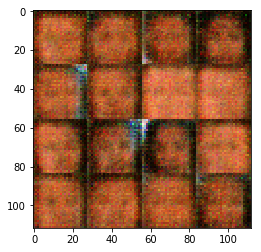

Epoch 1/1... Discriminator Loss: 0.9540... Generator Loss: 1.2073
Epoch 1/1... Discriminator Loss: 0.7029... Generator Loss: 1.1578
Epoch 1/1... Discriminator Loss: 0.8234... Generator Loss: 1.5866
Epoch 1/1... Discriminator Loss: 1.0530... Generator Loss: 0.5132
Epoch 1/1... Discriminator Loss: 1.3247... Generator Loss: 0.3813
Epoch 1/1... Discriminator Loss: 0.6290... Generator Loss: 1.3638
Epoch 1/1... Discriminator Loss: 1.4431... Generator Loss: 0.3951
Epoch 1/1... Discriminator Loss: 0.8496... Generator Loss: 1.0880
Epoch 1/1... Discriminator Loss: 0.9684... Generator Loss: 1.3948
Epoch 1/1... Discriminator Loss: 1.0767... Generator Loss: 1.2076


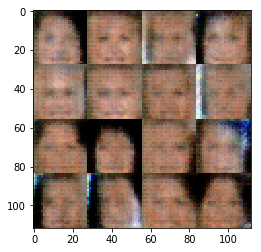

Epoch 1/1... Discriminator Loss: 1.0872... Generator Loss: 1.1894
Epoch 1/1... Discriminator Loss: 1.2070... Generator Loss: 1.2337
Epoch 1/1... Discriminator Loss: 1.0037... Generator Loss: 1.4494
Epoch 1/1... Discriminator Loss: 0.9579... Generator Loss: 1.1842
Epoch 1/1... Discriminator Loss: 1.1508... Generator Loss: 0.8810
Epoch 1/1... Discriminator Loss: 0.7772... Generator Loss: 0.9590
Epoch 1/1... Discriminator Loss: 1.5348... Generator Loss: 1.7588
Epoch 1/1... Discriminator Loss: 0.9614... Generator Loss: 1.3025
Epoch 1/1... Discriminator Loss: 1.6009... Generator Loss: 0.3262
Epoch 1/1... Discriminator Loss: 1.3063... Generator Loss: 0.4730


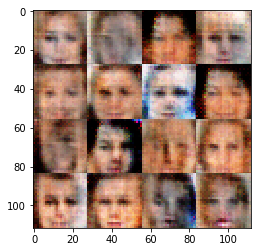

Epoch 1/1... Discriminator Loss: 1.1612... Generator Loss: 0.7067
Epoch 1/1... Discriminator Loss: 1.2015... Generator Loss: 0.6901
Epoch 1/1... Discriminator Loss: 1.3420... Generator Loss: 1.4349
Epoch 1/1... Discriminator Loss: 1.1424... Generator Loss: 1.0187
Epoch 1/1... Discriminator Loss: 1.2298... Generator Loss: 0.7877
Epoch 1/1... Discriminator Loss: 1.3271... Generator Loss: 0.6016
Epoch 1/1... Discriminator Loss: 0.9570... Generator Loss: 0.7893
Epoch 1/1... Discriminator Loss: 1.1791... Generator Loss: 0.6896
Epoch 1/1... Discriminator Loss: 1.1550... Generator Loss: 0.8697
Epoch 1/1... Discriminator Loss: 1.0893... Generator Loss: 0.9690


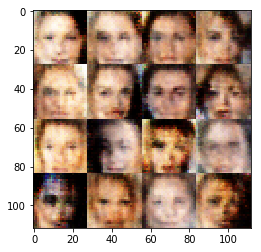

Epoch 1/1... Discriminator Loss: 1.2767... Generator Loss: 0.5127
Epoch 1/1... Discriminator Loss: 1.2576... Generator Loss: 0.9730
Epoch 1/1... Discriminator Loss: 1.2958... Generator Loss: 0.8833
Epoch 1/1... Discriminator Loss: 1.4295... Generator Loss: 1.7265
Epoch 1/1... Discriminator Loss: 1.2325... Generator Loss: 0.6014
Epoch 1/1... Discriminator Loss: 1.4941... Generator Loss: 1.2138
Epoch 1/1... Discriminator Loss: 1.3489... Generator Loss: 1.0985
Epoch 1/1... Discriminator Loss: 1.2241... Generator Loss: 1.1021
Epoch 1/1... Discriminator Loss: 1.1981... Generator Loss: 0.6465
Epoch 1/1... Discriminator Loss: 1.2838... Generator Loss: 0.8773


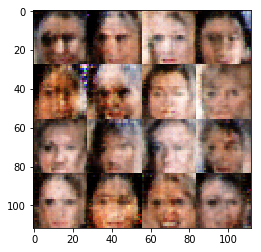

Epoch 1/1... Discriminator Loss: 1.2110... Generator Loss: 1.0024
Epoch 1/1... Discriminator Loss: 1.1773... Generator Loss: 0.9675
Epoch 1/1... Discriminator Loss: 1.4112... Generator Loss: 0.4131
Epoch 1/1... Discriminator Loss: 1.3459... Generator Loss: 0.7091
Epoch 1/1... Discriminator Loss: 1.3442... Generator Loss: 0.6948
Epoch 1/1... Discriminator Loss: 1.3831... Generator Loss: 1.2343
Epoch 1/1... Discriminator Loss: 1.2842... Generator Loss: 0.9540
Epoch 1/1... Discriminator Loss: 1.2182... Generator Loss: 0.7864
Epoch 1/1... Discriminator Loss: 1.2946... Generator Loss: 0.7567
Epoch 1/1... Discriminator Loss: 1.2110... Generator Loss: 0.7621


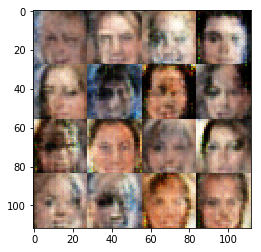

Epoch 1/1... Discriminator Loss: 1.4863... Generator Loss: 1.0459
Epoch 1/1... Discriminator Loss: 1.1337... Generator Loss: 0.8320
Epoch 1/1... Discriminator Loss: 1.1520... Generator Loss: 0.8565
Epoch 1/1... Discriminator Loss: 1.1813... Generator Loss: 0.7942
Epoch 1/1... Discriminator Loss: 1.4913... Generator Loss: 0.7662
Epoch 1/1... Discriminator Loss: 1.3367... Generator Loss: 0.5942
Epoch 1/1... Discriminator Loss: 1.2432... Generator Loss: 0.9045
Epoch 1/1... Discriminator Loss: 1.3988... Generator Loss: 0.7838
Epoch 1/1... Discriminator Loss: 1.1714... Generator Loss: 0.7303
Epoch 1/1... Discriminator Loss: 1.4022... Generator Loss: 0.8375


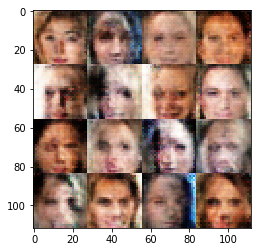

Epoch 1/1... Discriminator Loss: 1.4378... Generator Loss: 0.8891
Epoch 1/1... Discriminator Loss: 1.5003... Generator Loss: 0.7197
Epoch 1/1... Discriminator Loss: 1.2821... Generator Loss: 0.7478
Epoch 1/1... Discriminator Loss: 1.3454... Generator Loss: 0.7294
Epoch 1/1... Discriminator Loss: 1.4030... Generator Loss: 0.6911
Epoch 1/1... Discriminator Loss: 1.3150... Generator Loss: 0.7236
Epoch 1/1... Discriminator Loss: 1.2007... Generator Loss: 0.7844
Epoch 1/1... Discriminator Loss: 1.4080... Generator Loss: 1.0842
Epoch 1/1... Discriminator Loss: 1.2927... Generator Loss: 0.6144
Epoch 1/1... Discriminator Loss: 1.3138... Generator Loss: 0.7140


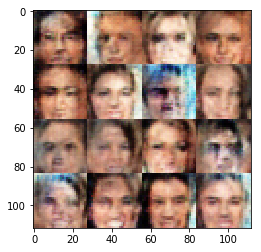

Epoch 1/1... Discriminator Loss: 1.1543... Generator Loss: 0.8088
Epoch 1/1... Discriminator Loss: 1.2758... Generator Loss: 0.6406
Epoch 1/1... Discriminator Loss: 1.3755... Generator Loss: 0.5654
Epoch 1/1... Discriminator Loss: 1.3028... Generator Loss: 0.7609
Epoch 1/1... Discriminator Loss: 1.2133... Generator Loss: 0.6910
Epoch 1/1... Discriminator Loss: 1.5551... Generator Loss: 0.3496
Epoch 1/1... Discriminator Loss: 1.2640... Generator Loss: 0.5914
Epoch 1/1... Discriminator Loss: 1.5532... Generator Loss: 1.0443
Epoch 1/1... Discriminator Loss: 1.2163... Generator Loss: 0.7538
Epoch 1/1... Discriminator Loss: 1.2911... Generator Loss: 0.8520


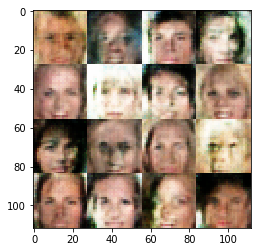

Epoch 1/1... Discriminator Loss: 1.2358... Generator Loss: 0.7762
Epoch 1/1... Discriminator Loss: 1.2308... Generator Loss: 0.6068
Epoch 1/1... Discriminator Loss: 1.2861... Generator Loss: 0.6420
Epoch 1/1... Discriminator Loss: 1.4922... Generator Loss: 0.3382
Epoch 1/1... Discriminator Loss: 1.3188... Generator Loss: 0.5226
Epoch 1/1... Discriminator Loss: 1.5693... Generator Loss: 1.6293
Epoch 1/1... Discriminator Loss: 1.4058... Generator Loss: 0.6592
Epoch 1/1... Discriminator Loss: 1.3727... Generator Loss: 0.8232
Epoch 1/1... Discriminator Loss: 1.2773... Generator Loss: 0.7229
Epoch 1/1... Discriminator Loss: 1.3395... Generator Loss: 0.5717


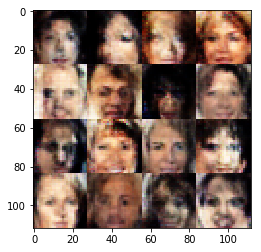

Epoch 1/1... Discriminator Loss: 1.5739... Generator Loss: 1.1797
Epoch 1/1... Discriminator Loss: 1.3210... Generator Loss: 0.7836
Epoch 1/1... Discriminator Loss: 1.1664... Generator Loss: 0.7269
Epoch 1/1... Discriminator Loss: 1.3627... Generator Loss: 0.5925
Epoch 1/1... Discriminator Loss: 1.4129... Generator Loss: 0.9631
Epoch 1/1... Discriminator Loss: 1.2731... Generator Loss: 0.6684
Epoch 1/1... Discriminator Loss: 1.1615... Generator Loss: 0.8011
Epoch 1/1... Discriminator Loss: 1.5815... Generator Loss: 0.3481
Epoch 1/1... Discriminator Loss: 1.2667... Generator Loss: 0.7367
Epoch 1/1... Discriminator Loss: 1.3386... Generator Loss: 1.0382


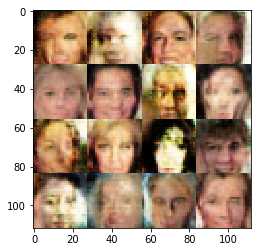

Epoch 1/1... Discriminator Loss: 1.2752... Generator Loss: 0.6722
Epoch 1/1... Discriminator Loss: 1.3653... Generator Loss: 0.9272
Epoch 1/1... Discriminator Loss: 1.3049... Generator Loss: 0.4649
Epoch 1/1... Discriminator Loss: 1.5359... Generator Loss: 1.4964
Epoch 1/1... Discriminator Loss: 1.1691... Generator Loss: 1.0665
Epoch 1/1... Discriminator Loss: 1.4819... Generator Loss: 1.5341
Epoch 1/1... Discriminator Loss: 1.3105... Generator Loss: 0.7051
Epoch 1/1... Discriminator Loss: 1.2383... Generator Loss: 0.6750
Epoch 1/1... Discriminator Loss: 1.2478... Generator Loss: 1.0723
Epoch 1/1... Discriminator Loss: 1.3381... Generator Loss: 1.3266


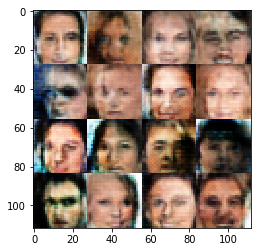

Epoch 1/1... Discriminator Loss: 1.1476... Generator Loss: 0.7023
Epoch 1/1... Discriminator Loss: 1.3236... Generator Loss: 0.5023
Epoch 1/1... Discriminator Loss: 1.5435... Generator Loss: 1.3928
Epoch 1/1... Discriminator Loss: 1.2295... Generator Loss: 0.5737
Epoch 1/1... Discriminator Loss: 1.4159... Generator Loss: 0.3962
Epoch 1/1... Discriminator Loss: 1.2184... Generator Loss: 0.8770
Epoch 1/1... Discriminator Loss: 1.2367... Generator Loss: 1.0731
Epoch 1/1... Discriminator Loss: 1.4314... Generator Loss: 0.6338
Epoch 1/1... Discriminator Loss: 1.5164... Generator Loss: 0.3613
Epoch 1/1... Discriminator Loss: 1.1516... Generator Loss: 0.9745


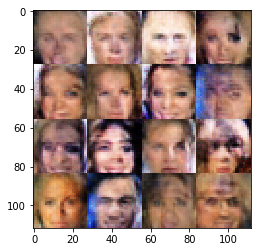

Epoch 1/1... Discriminator Loss: 1.6652... Generator Loss: 0.2679
Epoch 1/1... Discriminator Loss: 1.3647... Generator Loss: 0.5912
Epoch 1/1... Discriminator Loss: 1.5075... Generator Loss: 0.4421
Epoch 1/1... Discriminator Loss: 1.3381... Generator Loss: 0.6414
Epoch 1/1... Discriminator Loss: 1.0642... Generator Loss: 1.0347
Epoch 1/1... Discriminator Loss: 1.2427... Generator Loss: 0.8735
Epoch 1/1... Discriminator Loss: 1.1154... Generator Loss: 0.8172
Epoch 1/1... Discriminator Loss: 1.3768... Generator Loss: 0.7878
Epoch 1/1... Discriminator Loss: 1.2824... Generator Loss: 0.9910
Epoch 1/1... Discriminator Loss: 1.2801... Generator Loss: 0.8368


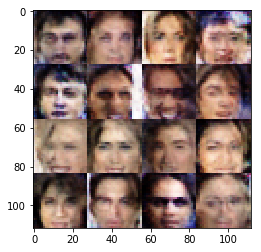

Epoch 1/1... Discriminator Loss: 1.5316... Generator Loss: 1.7956
Epoch 1/1... Discriminator Loss: 1.1957... Generator Loss: 0.8273
Epoch 1/1... Discriminator Loss: 1.3778... Generator Loss: 0.4549
Epoch 1/1... Discriminator Loss: 1.2023... Generator Loss: 0.6222
Epoch 1/1... Discriminator Loss: 1.3083... Generator Loss: 1.0091
Epoch 1/1... Discriminator Loss: 1.3430... Generator Loss: 0.6184
Epoch 1/1... Discriminator Loss: 1.1889... Generator Loss: 0.6584
Epoch 1/1... Discriminator Loss: 1.3293... Generator Loss: 0.9958
Epoch 1/1... Discriminator Loss: 1.2555... Generator Loss: 0.8372
Epoch 1/1... Discriminator Loss: 1.3669... Generator Loss: 0.5739


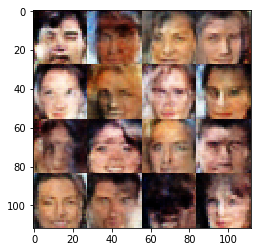

Epoch 1/1... Discriminator Loss: 1.2125... Generator Loss: 0.7816
Epoch 1/1... Discriminator Loss: 1.2677... Generator Loss: 0.6279
Epoch 1/1... Discriminator Loss: 1.1968... Generator Loss: 0.7886
Epoch 1/1... Discriminator Loss: 1.2474... Generator Loss: 0.8006
Epoch 1/1... Discriminator Loss: 1.2840... Generator Loss: 1.1516
Epoch 1/1... Discriminator Loss: 1.2410... Generator Loss: 1.4470
Epoch 1/1... Discriminator Loss: 1.1694... Generator Loss: 1.0578
Epoch 1/1... Discriminator Loss: 1.2038... Generator Loss: 0.7392


In [13]:
batch_size = 128
z_dim = 128
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.